
*Note:* You can run this example locally (`ploomber examples -n ml-intermediate`) or in Binder (hosted JupyterLab ).

[![binder-logo](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Fml-intermediate%252FREADME.ipynb%26branch%3Dmaster)


# Intermediate ML project

Example showing training and serving ML pipelines with integration testing to evaluate training data quality.

## Setup

~~~bash
# conda
conda env create --file environment.yml
conda activate ml-intermediate

# pip
pip install -r requirements.txt
~~~

## Training pipeline

The training pipeline prepares some data (`get`, `sepal-area`, `petal-area`), joins everything into a single file (`join`) and fits a model (`fit`). 

  0%|          | 0/5 [00:00<?, ?it/s]

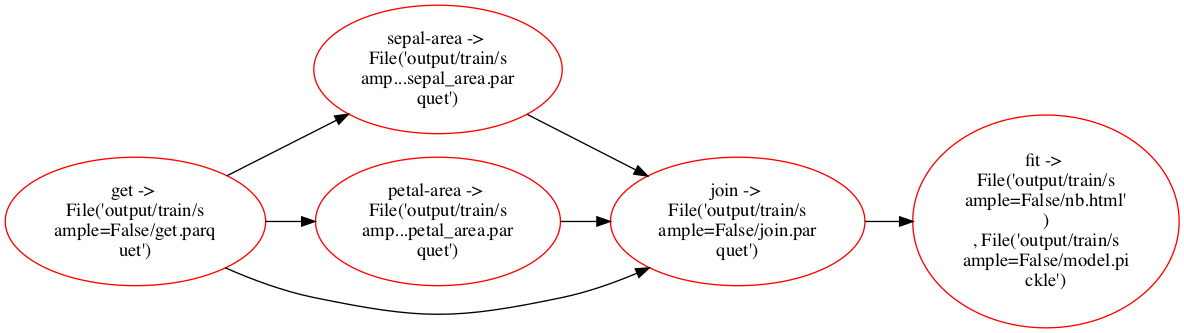

In [1]:
from ploomber.spec import DAGSpec

dag_train = DAGSpec('pipeline.yaml').to_dag()
dag_train.plot()

## Serving pipeline

The serving pipeline gets data that we want to make predictions on, generates the same features that we created during training, joins everything into a single file and makes predictions using a previously trained model.

  0%|          | 0/5 [00:00<?, ?it/s]

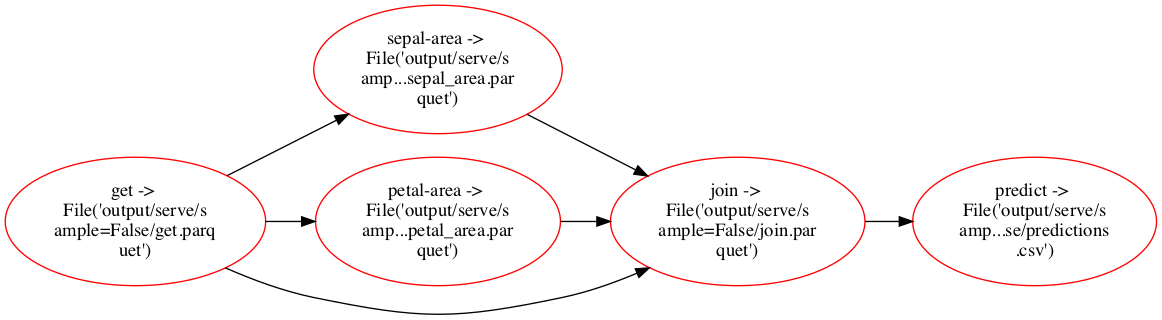

In [2]:
dag_serve = DAGSpec('pipeline.serve.yaml').to_dag()
dag_serve.plot()

## Integration testing

This example also shows how to use integration testing to evaluate the quality of our data. The `join` task uses the `on_finish` hook, which allows us to run a function when the task finishes execution:

In [3]:
# note: this is only needed to display a file, you may skip it if running locally
from ploomberutils import display_file
display_file('partial.features.yaml', lines=(10, 13))


```yaml
  name: join
  product: "{{root}}/sample={{sample}}/join.parquet"
  on_finish: integration.no_missing_values
```


The function checks that there are no missing values in the data frame, otherwise it raises an exception:

In [4]:
display_file('integration.py', syntax='python')


```python
import pandas as pd


def no_missing_values(product):
    df = pd.read_parquet(str(product))
    assert not df.isna().sum().sum(), f'Found missing values in {product}'
```


## Training a model

To train a model, run:

In [5]:
%%sh
%%sh
ploomber build

name        Ran?      Elapsed (s)    Percentage
----------  ------  -------------  ------------
get         True         0.024181      0.465919
sepal-area  True         0.032325      0.622838
petal-area  True         0.024083      0.464031
join        True         0.029774      0.573685
fit         True         5.07959      97.8735


sh: line 1: fg: no job control
Building task 'fit': 100%|██████████| 5/5 [00:18<00:00,  3.68s/it]


## Serving predictions

Once the model trains, run the serving pipeline with:

In [6]:
%%sh
%%sh
ploomber build --entry-point pipeline.serve.yaml

name        Ran?      Elapsed (s)    Percentage
----------  ------  -------------  ------------
get         True         0.008389        3.7557
sepal-area  True         0.025541       11.4345
petal-area  True         0.024515       10.9752
join        True         0.031164       13.9519
predict     True         0.133758       59.8826


sh: line 1: fg: no job control
Building task 'predict': 100%|██████████| 5/5 [00:16<00:00,  3.30s/it]
